# Customer segmentation on Wine PCA 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=None
pd.options.display.max_columns=None
np.set_printoptions(suppress=True)

## Importing Data

In [3]:
wine=pd.read_csv(r"D:\Data science\Python\ML\PCA\Wine.csv")
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045,1


In [34]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [35]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [36]:
wine.shape

(178, 14)

In [37]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [38]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

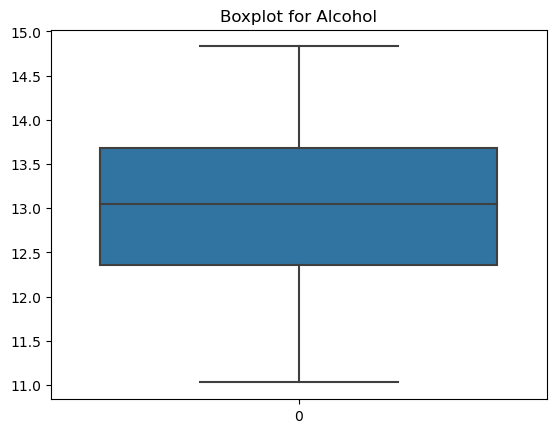

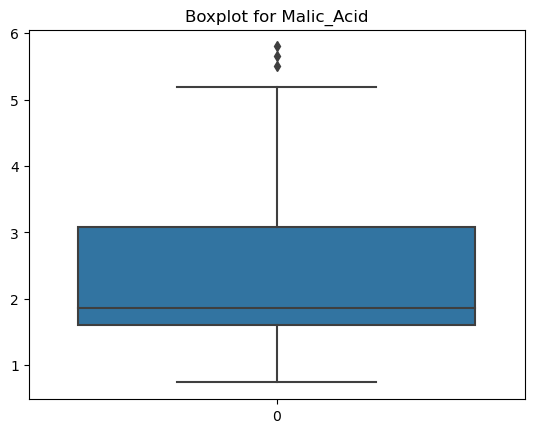

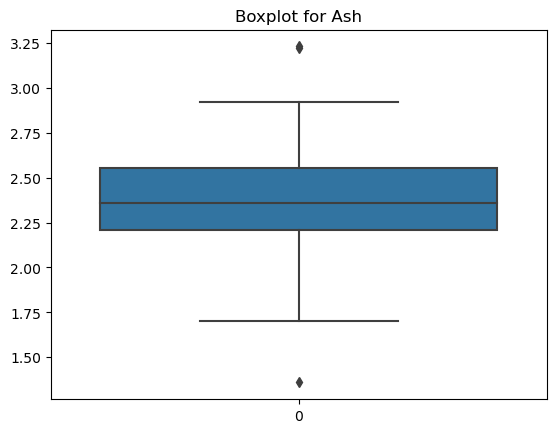

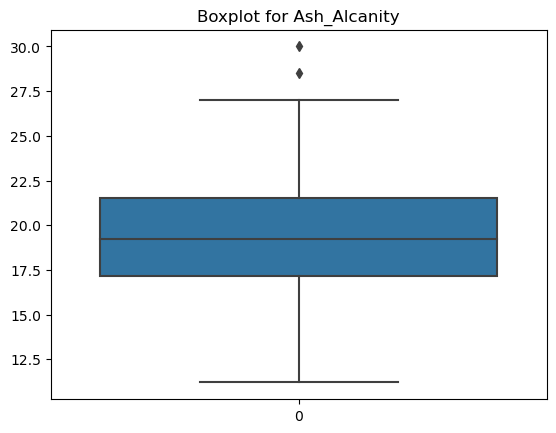

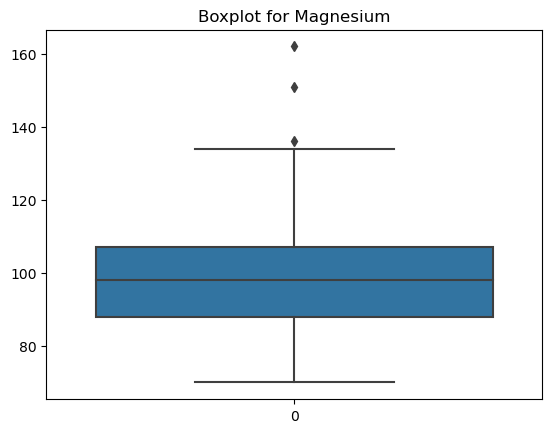

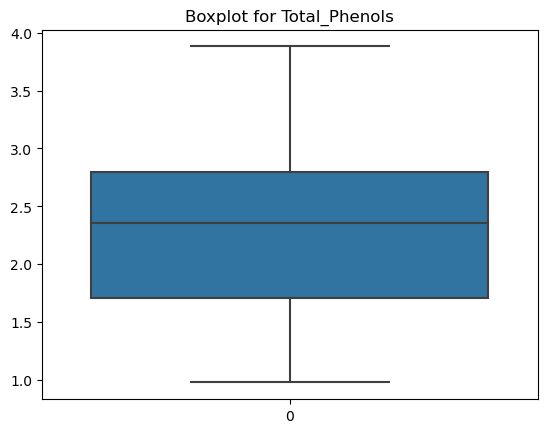

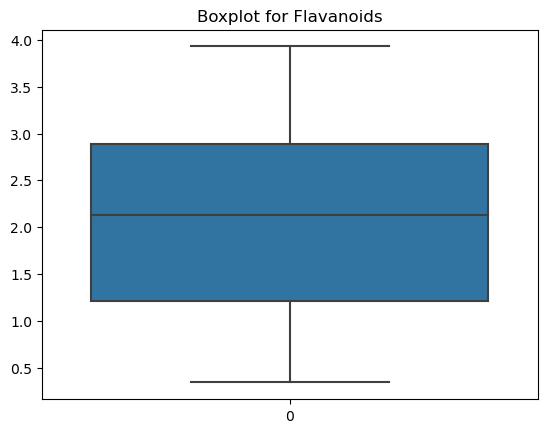

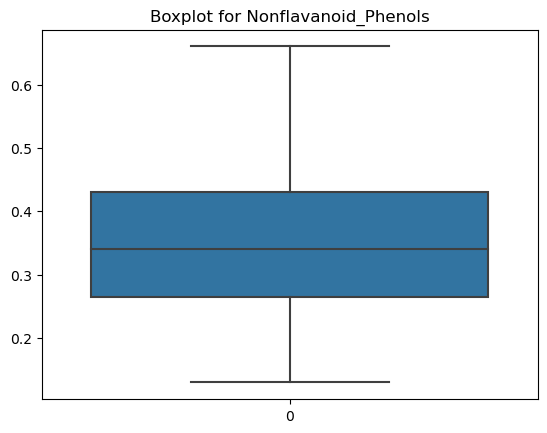

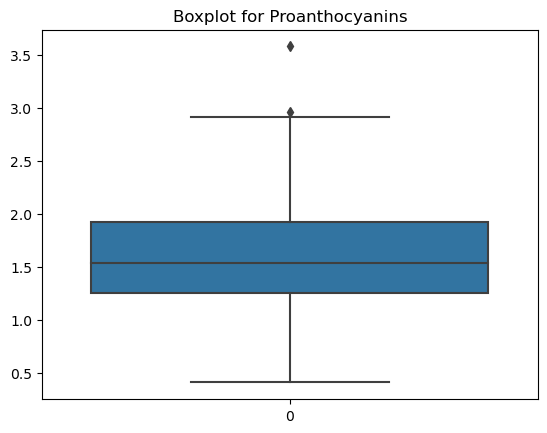

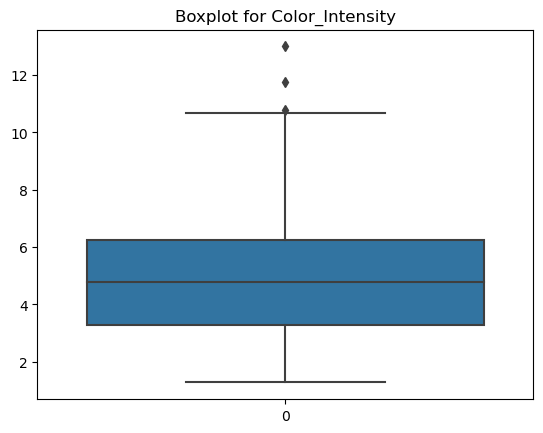

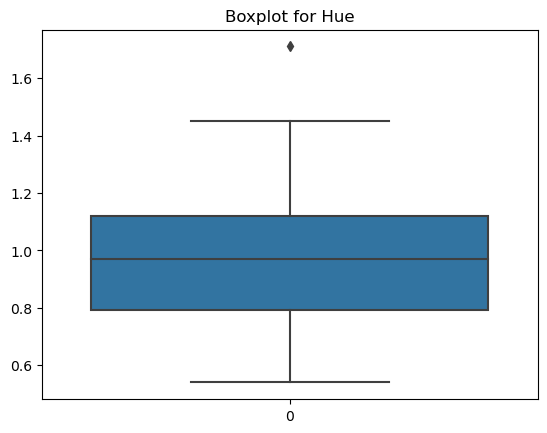

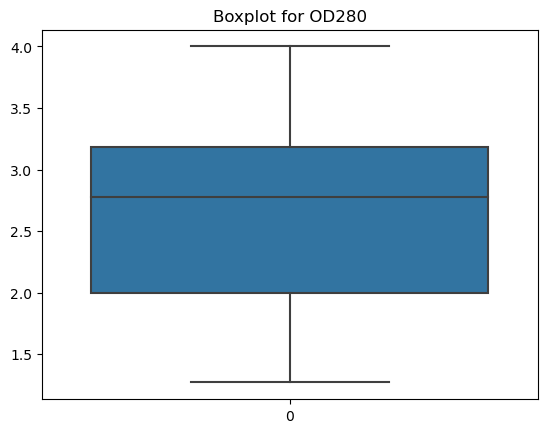

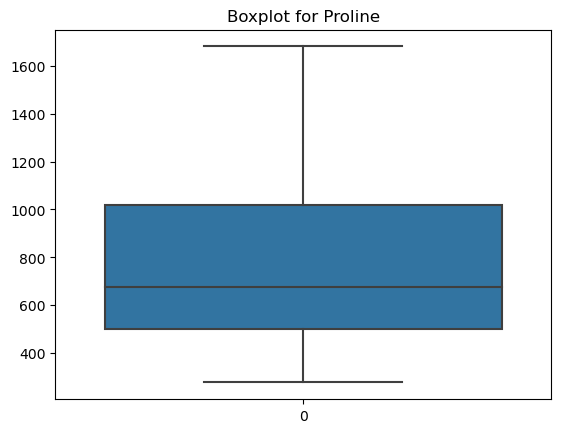

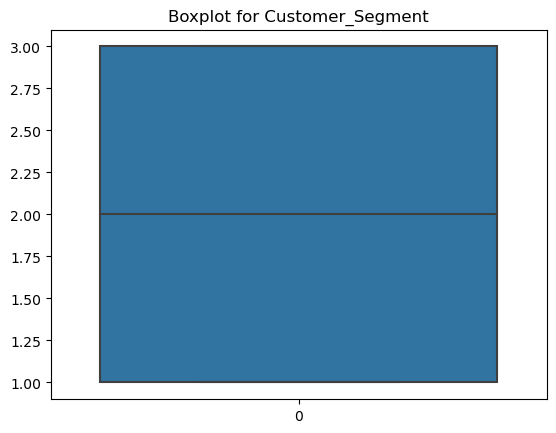

In [60]:
cols=wine.columns
for i in cols:
    sns.boxplot(wine[i])
    plt.title(f'Boxplot for {i}')
    plt.show()
    Q1=wine[i].quantile(0.25)
    Q3=wine[i].quantile(0.75)
    IQR=Q3-Q1
    wine=wine[(wine[i] > Q1- 1.5* IQR) &(wine[i] < Q3 + 1.5* IQR)].reset_index(drop=True)

In [61]:
wine.shape

(161, 14)

In [62]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [63]:
df_num_features=wine.select_dtypes(exclude='object')
df_num_features.drop('Customer_Segment',axis=1,inplace=True)
df_num_features

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [64]:
df_num_features.shape

(161, 13)

## Standardizing data

In [68]:
from sklearn.preprocessing import StandardScaler
df_num_std=StandardScaler().fit_transform(df_num_features)

In [69]:
df_num_std

array([[ 1.51516332, -0.57916566,  0.27093638, ...,  0.3833328 ,
         1.82809675,  0.98217445],
       [ 0.20964771, -0.51250719, -0.93153695, ...,  0.42947949,
         1.09692792,  0.93483012],
       [ 0.15894808,  0.03980581,  1.26608672, ...,  0.33718612,
         0.77352632,  1.36092915],
       ...,
       [ 0.29837208,  1.8681523 , -0.43396178, ..., -1.69326819,
        -1.49028487,  0.25622795],
       [ 0.17162299,  0.25882648,  0.02214879, ..., -1.6471215 ,
        -1.40591924,  0.27200939],
       [ 1.38841423,  1.69674482,  1.5563389 , ..., -1.60097481,
        -1.43404112, -0.61175157]])

In [71]:
df_num_std.shape

(161, 13)

## PCA

In [73]:
cov_mat=np.cov(df_num_std.T)
cov_mat[0:5]

array([[ 1.00625   ,  0.09725538,  0.22675131, -0.34054958,  0.42386531,
         0.3276344 ,  0.30444773, -0.17637052,  0.21680952,  0.54423566,
        -0.01054545,  0.10919042,  0.6565025 ],
       [ 0.09725538,  1.00625   ,  0.18486372,  0.31296748,  0.03033462,
        -0.37176456, -0.46313905,  0.30151427, -0.24350547,  0.30609278,
        -0.58609384, -0.40202172, -0.1832277 ],
       [ 0.22675131,  0.18486372,  1.00625   ,  0.32269493,  0.42375013,
         0.10670534,  0.04414894,  0.09115183,  0.03123726,  0.21217724,
        -0.04343525, -0.03310184,  0.2735448 ],
       [-0.34054958,  0.31296748,  0.32269493,  1.00625   , -0.17800729,
        -0.45588719, -0.51060447,  0.34252935, -0.30999345, -0.03191613,
        -0.3204318 , -0.37802518, -0.47538171],
       [ 0.42386531,  0.03033462,  0.42375013, -0.17800729,  1.00625   ,
         0.24094267,  0.20043099, -0.23730878,  0.10023165,  0.34906976,
        -0.02178624,  0.02154006,  0.45240865]])

In [78]:
from numpy.linalg import eig
eig_val,eig_vec=np.linalg.eig(cov_mat)
print('Eigen values :',eig_val,'\n\n\n\nEigen vectors :', eig_vec)

Eigen values : [5.04313617 2.70251793 1.24420301 0.91340121 0.74614924 0.56313075
 0.07548675 0.46316555 0.17377599 0.34675615 0.31297127 0.2339036
 0.26265236] 



Eigen vectors : [[ 0.17161178 -0.4486929  -0.18081562 -0.0234822   0.22772023 -0.15633971
  -0.04562935  0.43723874  0.20961996  0.28631789 -0.42553294 -0.3392605
   0.21053644]
 [-0.23752985 -0.25097967  0.07026231  0.54091995  0.05486988 -0.63693141
   0.04322724 -0.02829994 -0.0378083   0.17068591  0.12427279  0.21468015
  -0.2821371 ]
 [ 0.01057842 -0.31079489  0.70464382 -0.14274413  0.09558633 -0.02402838
  -0.02773113  0.05002101 -0.05627274 -0.23156098  0.27947793 -0.46967222
  -0.13387903]
 [-0.27482858  0.03911351  0.55185965  0.16633094  0.0076764   0.35546897
   0.05743633  0.34052978  0.08047051  0.19232197 -0.29325105  0.44275117
   0.13985611]
 [ 0.12570021 -0.39482154  0.18359623 -0.27606225 -0.55366648 -0.14311143
   0.01546726 -0.47276113 -0.02663393  0.21916122 -0.2339087   0.16897519
   0.18873472]
 [ 0.

In [79]:
eig_val=list(eig_val)
eig_val.sort(reverse=True)
print(eig_val)

[5.043136172127929, 2.702517934508049, 1.2442030093485934, 0.9134012145517332, 0.7461492397080656, 0.563130746966093, 0.4631655547833121, 0.3467561480247529, 0.3129712748205557, 0.2626523647826413, 0.23390360100986188, 0.17377599261696428, 0.07548674675145775]


## Elbow Plot

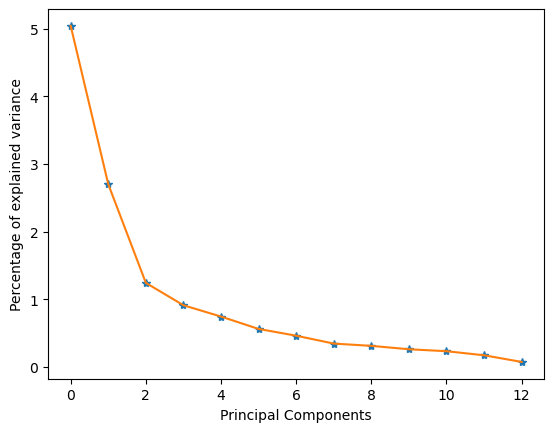

In [82]:
plt.plot(eig_val,'*')
plt.plot(eig_val)
plt.xlabel('Principal Components')    
plt.ylabel('Percentage of explained variance')
plt.show()

In [83]:
eiganvector=eig_vec[:,:3]
eiganvector

array([[ 0.17161178, -0.4486929 , -0.18081562],
       [-0.23752985, -0.25097967,  0.07026231],
       [ 0.01057842, -0.31079489,  0.70464382],
       [-0.27482858,  0.03911351,  0.55185965],
       [ 0.12570021, -0.39482154,  0.18359623],
       [ 0.39126654, -0.03328129,  0.09807092],
       [ 0.42377451,  0.03043168,  0.07288013],
       [-0.29348719, -0.02140495,  0.05422099],
       [ 0.32425906,  0.00136401,  0.09137648],
       [-0.06495018, -0.50807388, -0.2347088 ],
       [ 0.28769489,  0.25921425,  0.14177781],
       [ 0.36242847,  0.18089061,  0.14242605],
       [ 0.28353394, -0.34803769, -0.0767855 ]])

In [84]:
df_pca=pd.DataFrame(df_num_std.dot(eiganvector),columns=['PC1','PC2','PC3'])
df_pca.head()

,PC1,PC2,PC3
0,3.503528,-1.609446,0.039412
1,2.342642,0.331164,-1.978331
2,2.661349,-0.936183,1.126533
3,3.925301,-2.710827,-0.146296
4,1.032831,-1.074396,2.445841


In [85]:
df_pca.shape

(161, 3)

In [122]:
wine_pca=pd.concat([df_pca,wine['Customer_Segment']],axis=1)
wine_pca

,PC1,PC2,PC3,Customer_Segment
0,3.503528,-1.609446,0.039412,1
1,2.342642,0.331164,-1.978331,1
2,2.661349,-0.936183,1.126533,1
3,3.925301,-2.710827,-0.146296,1
4,1.032831,-1.074396,2.445841,1
5,3.238774,-2.128058,-0.543652,1
6,2.628166,-1.058183,-0.801240,1
7,2.111602,-1.822125,0.626217,1
8,2.729920,-0.765262,-1.797767,1
9,2.889251,-0.654371,-1.055483,1


In [121]:
wine_pca.size

644

In [103]:
wine_pca=pd.DataFrame(wine_pca,columns=['PC1','PC2','PC3','Customer_Segment']
                     )
wine_pca

,PC1,PC2,PC3,Customer_Segment
0,1.564978,-0.982076,0.035443,-1.165639
1,1.046426,0.202075,-1.779124,-1.165639
2,1.188788,-0.571254,1.013098,-1.165639
3,1.753378,-1.654133,-0.131565,-1.165639
4,0.461352,-0.655591,2.199558,-1.165639
5,1.446716,-1.298531,-0.488909,-1.165639
6,1.173966,-0.645698,-0.720559,-1.165639
7,0.943224,-1.111852,0.563160,-1.165639
8,1.219418,-0.466959,-1.616742,-1.165639
9,1.290589,-0.399294,-0.949202,-1.165639


In [123]:
wine_pca.shape

(161, 4)

## K MEANS CLUSTERING

In [124]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters=[2,3,4]

for k in n_clusters:
    cluster= KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(wine_pca)
    score=silhouette_score(wine_pca, predict, random_state= 10)
    print("For n_clusters = {}, silhouette score is {}".format(k, score))



C:\Users\chand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2, silhouette score is 0.40640369989099423


C:\Users\chand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3, silhouette score is 0.4887695237726945


C:\Users\chand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, silhouette score is 0.43083939792846654


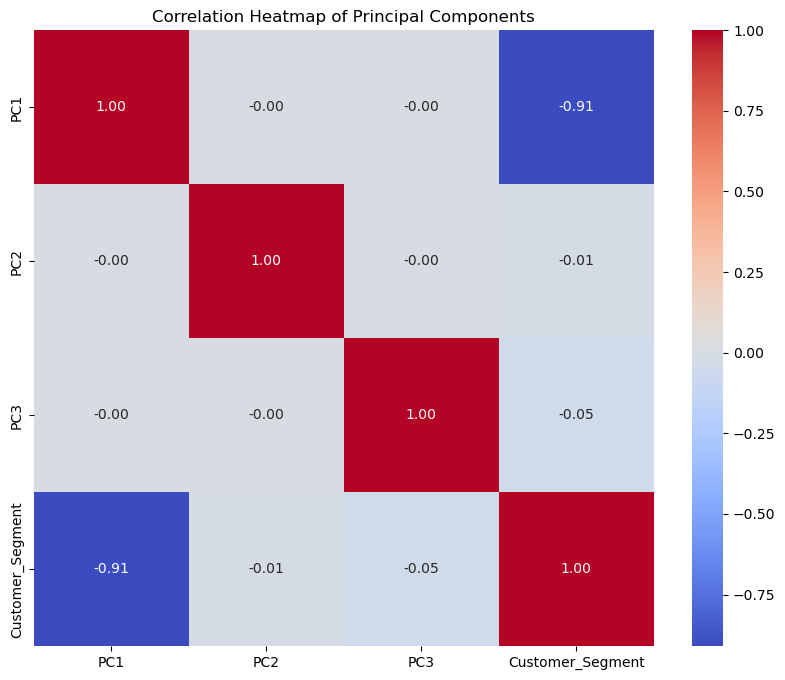

In [117]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_pca.corr(), annot=True, cmap='coolwarm',fmt=".2f") 
plt.title('Correlation Heatmap of Principal Components')
plt.show()

In [109]:
KMeans_model=KMeans(n_clusters=3,random_state=2)

KMeans_model.fit(wine_pca)

C:\Users\chand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=2)

In [125]:
out=wine_pca.copy()

out['Cluster']= KMeans_model.labels_



In [126]:
out

,PC1,PC2,PC3,Customer_Segment,Cluster
0,3.503528,-1.609446,0.039412,1,1
1,2.342642,0.331164,-1.978331,1,1
2,2.661349,-0.936183,1.126533,1,1
3,3.925301,-2.710827,-0.146296,1,1
4,1.032831,-1.074396,2.445841,1,1
5,3.238774,-2.128058,-0.543652,1,1
6,2.628166,-1.058183,-0.801240,1,1
7,2.111602,-1.822125,0.626217,1,1
8,2.729920,-0.765262,-1.797767,1,1
9,2.889251,-0.654371,-1.055483,1,1


Text(1.9, 43, '43')

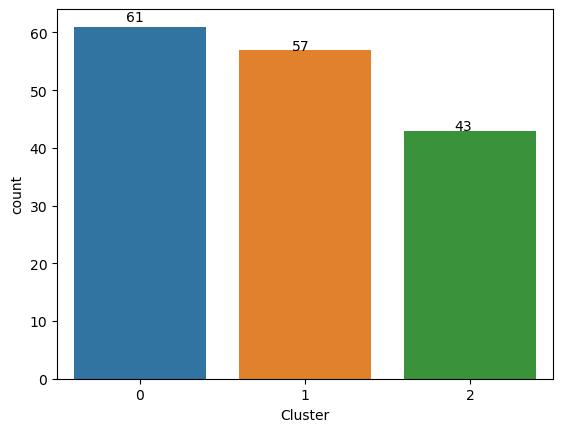

In [160]:
sns.countplot(data=out,x="Cluster")
plt.xlabel('Cluster')


plt.text(x = -0.08, y =62, s = np.unique(KMeans_model.labels_, return_counts=True)[1][0])
plt.text(x = 0.92, y =57, s = np.unique(KMeans_model.labels_, return_counts=True)[1][1])
plt.text(x = 1.9, y =43, s = np.unique(KMeans_model.labels_, return_counts=True)[1][2])

In [141]:
np.unique(KMeans_model.labels_, return_counts=True)[1]

array([61, 57, 43], dtype=int64)

## Conclusion

Through the application of PCA (Principal Component Analysis) for dimensionality reduction and subsequent clustering using KMeans and Hierarchical techniques, we have effectively segmented wine samples into 3 distinct clusters based on their chemical composition. The clusters reveal meaningful patterns within the data, offering insights into the underlying structure of the wine dataset. KMeans method provided consistent results, indicating robustness in cluster formation. Further analysis and interpretation of these clusters can potentially aid in understanding wine characteristics and inform decision-making processes in the wine industry, such as product marketing and quality assessment.